## Simple Model

### let's do SLR for simple modeling

In [348]:
import pandas as pd, numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from pathlib import Path

pd.set_option('display.float_format', lambda x: f'{x:,.4f}')

In [349]:
# load data
path = '/Users/Marcy_Student/Desktop/Marcy-Modules/Mod6/final-project/data/clean_full_collisions.csv'
df = pd.read_csv(path)
df = df.drop(columns=['Unnamed: 0', 'unnamed:_0.1', 'unnamed:_0', 'vehicles_combined', 'vehicle_clean'])
df

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,cross_street_name,off_street_name,...,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5,month,season,is_electric,total_injury_death,total_injury_death_flag,is_government,boroname
0,2022-01-01,7,NaN,NaN,40.7715,-73.9182,"(40.771477, -73.91824)",HOYT AVENUE NORTH,NaN,NaN,...,NaN,NaN,NaN,1,Winter,0,0,0,0,Queens
1,2022-01-01,4,NaN,NaN,NaN,NaN,NaN,Southern parkway,Jfk expressway,NaN,...,NaN,NaN,NaN,1,Winter,0,0,0,0,NaN
2,2022-01-01,7,NaN,NaN,NaN,NaN,NaN,WESTCHESTER AVENUE,SHERIDAN EXPRESSWAY,NaN,...,NaN,NaN,NaN,1,Winter,0,0,0,0,NaN
3,2022-01-01,5,NaN,NaN,40.7469,-73.8487,"(40.74693, -73.84866)",GRAND CENTRAL PKWY,NaN,NaN,...,NaN,NaN,NaN,1,Winter,0,2,1,0,Queens
4,2022-01-01,1,NaN,NaN,40.8192,-73.9604,"(40.819157, -73.96038)",HENRY HUDSON PARKWAY,NaN,NaN,...,NaN,NaN,NaN,1,Winter,0,0,0,1,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369996,2025-12-02,10,BRONX,"10,475.0000",40.8847,-73.8313,"(40.884712, -73.8313)",DYRE AVE,BOSTON RD,NaN,...,NaN,NaN,NaN,12,Winter,0,2,1,0,Bronx
369997,2025-12-02,19,BRONX,"10,451.0000",40.8147,-73.9221,"(40.814716, -73.92207)",NaN,NaN,328 E 145 ST,...,NaN,NaN,NaN,12,Winter,0,0,0,0,Bronx
369998,2025-12-02,20,BROOKLYN,"11,219.0000",40.6390,-74.0004,"(40.639004, -74.0004)",NaN,NaN,948 50 ST,...,NaN,NaN,NaN,12,Winter,0,2,1,0,Brooklyn
369999,2025-12-02,5,NaN,NaN,40.7100,-73.9893,"(40.70996, -73.989334)",FDR DRIVE,NaN,NaN,...,NaN,NaN,NaN,12,Winter,0,2,1,0,Manhattan


In [350]:
df = df.dropna(subset=['boroname'])
df

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,cross_street_name,off_street_name,...,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5,month,season,is_electric,total_injury_death,total_injury_death_flag,is_government,boroname
0,2022-01-01,7,NaN,NaN,40.7715,-73.9182,"(40.771477, -73.91824)",HOYT AVENUE NORTH,NaN,NaN,...,NaN,NaN,NaN,1,Winter,0,0,0,0,Queens
3,2022-01-01,5,NaN,NaN,40.7469,-73.8487,"(40.74693, -73.84866)",GRAND CENTRAL PKWY,NaN,NaN,...,NaN,NaN,NaN,1,Winter,0,2,1,0,Queens
4,2022-01-01,1,NaN,NaN,40.8192,-73.9604,"(40.819157, -73.96038)",HENRY HUDSON PARKWAY,NaN,NaN,...,NaN,NaN,NaN,1,Winter,0,0,0,1,Manhattan
5,2022-01-01,16,BRONX,"10,454.0000",40.8061,-73.9180,"(40.806107, -73.91799)",NaN,NaN,520 EAST 137 STREET,...,NaN,NaN,NaN,1,Winter,0,0,0,0,Bronx
6,2022-01-01,13,QUEENS,"11,373.0000",40.7427,-73.8764,"(40.742737, -73.87643)",NaN,NaN,89-22 43 AVENUE,...,Station Wagon/Sport Utility Vehicle,NaN,NaN,1,Winter,0,0,0,1,Queens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369996,2025-12-02,10,BRONX,"10,475.0000",40.8847,-73.8313,"(40.884712, -73.8313)",DYRE AVE,BOSTON RD,NaN,...,NaN,NaN,NaN,12,Winter,0,2,1,0,Bronx
369997,2025-12-02,19,BRONX,"10,451.0000",40.8147,-73.9221,"(40.814716, -73.92207)",NaN,NaN,328 E 145 ST,...,NaN,NaN,NaN,12,Winter,0,0,0,0,Bronx
369998,2025-12-02,20,BROOKLYN,"11,219.0000",40.6390,-74.0004,"(40.639004, -74.0004)",NaN,NaN,948 50 ST,...,NaN,NaN,NaN,12,Winter,0,2,1,0,Brooklyn
369999,2025-12-02,5,NaN,NaN,40.7100,-73.9893,"(40.70996, -73.989334)",FDR DRIVE,NaN,NaN,...,NaN,NaN,NaN,12,Winter,0,2,1,0,Manhattan


In [351]:
# Removes rows with only 1 injured person. ONLY USE IF STRATIFY IS NEEDED FOR BETTER MODEL
#df_filtered = df[(df['number_of_persons_injured'] < 20) & (df['number_of_persons_injured']!=18)]
#df_filtered

In [352]:
# getting our dummies before train-test split
df_enc = pd.get_dummies(df, columns=['boroname'], drop_first=True)
# baseline of Fall

# feature engineering our interaction term
#season_cols = ['season_Spring', 'season_Summer', 'season_Winter']
boro_cols = ['boroname_Brooklyn', 'boroname_Manhattan', 'boroname_Queens', 'boroname_Staten Island']
for x in boro_cols:
    df_enc[f'interaction_is_government_{x}'] = df_enc['is_government'] * df_enc[x]

In [353]:
df_enc

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,cross_street_name,off_street_name,...,total_injury_death_flag,is_government,boroname_Brooklyn,boroname_Manhattan,boroname_Queens,boroname_Staten Island,interaction_is_government_boroname_Brooklyn,interaction_is_government_boroname_Manhattan,interaction_is_government_boroname_Queens,interaction_is_government_boroname_Staten Island
0,2022-01-01,7,NaN,NaN,40.7715,-73.9182,"(40.771477, -73.91824)",HOYT AVENUE NORTH,NaN,NaN,...,0,0,False,False,True,False,0,0,0,0
3,2022-01-01,5,NaN,NaN,40.7469,-73.8487,"(40.74693, -73.84866)",GRAND CENTRAL PKWY,NaN,NaN,...,1,0,False,False,True,False,0,0,0,0
4,2022-01-01,1,NaN,NaN,40.8192,-73.9604,"(40.819157, -73.96038)",HENRY HUDSON PARKWAY,NaN,NaN,...,0,1,False,True,False,False,0,1,0,0
5,2022-01-01,16,BRONX,"10,454.0000",40.8061,-73.9180,"(40.806107, -73.91799)",NaN,NaN,520 EAST 137 STREET,...,0,0,False,False,False,False,0,0,0,0
6,2022-01-01,13,QUEENS,"11,373.0000",40.7427,-73.8764,"(40.742737, -73.87643)",NaN,NaN,89-22 43 AVENUE,...,0,1,False,False,True,False,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369996,2025-12-02,10,BRONX,"10,475.0000",40.8847,-73.8313,"(40.884712, -73.8313)",DYRE AVE,BOSTON RD,NaN,...,1,0,False,False,False,False,0,0,0,0
369997,2025-12-02,19,BRONX,"10,451.0000",40.8147,-73.9221,"(40.814716, -73.92207)",NaN,NaN,328 E 145 ST,...,0,0,False,False,False,False,0,0,0,0
369998,2025-12-02,20,BROOKLYN,"11,219.0000",40.6390,-74.0004,"(40.639004, -74.0004)",NaN,NaN,948 50 ST,...,1,0,True,False,False,False,0,0,0,0
369999,2025-12-02,5,NaN,NaN,40.7100,-73.9893,"(40.70996, -73.989334)",FDR DRIVE,NaN,NaN,...,1,0,False,True,False,False,0,0,0,0


In [354]:
display(df_enc['is_government'].value_counts())
display(df['boroname'].value_counts())

is_government
0    194953
1    145333
Name: count, dtype: int64

boroname
Brooklyn         113562
Queens            95325
Manhattan         58805
Bronx             54343
Staten Island     18251
Name: count, dtype: int64

In [480]:
y = df_enc['total_injury_death_flag']
#y = df_enc['number_of_persons_injured']
#X = df_enc[['is_government']].astype(int)
X = sm.add_constant((df_enc.iloc[:,34:39].astype(int)))
#X = sm.add_constant((df_enc.iloc[:,[33,35,36,37,38,39,40,40]].astype(int)))
display(y)
display(X)

0         0
3         1
4         0
5         0
6         0
         ..
369996    1
369997    0
369998    1
369999    1
370000    1
Name: total_injury_death_flag, Length: 340286, dtype: int64

,const,is_government,boroname_Brooklyn,boroname_Manhattan,boroname_Queens,boroname_Staten Island
0,1.0000,0,0,0,1,0
3,1.0000,0,0,0,1,0
4,1.0000,1,0,1,0,0
5,1.0000,0,0,0,0,0
6,1.0000,1,0,0,1,0
...,...,...,...,...,...,...
369996,1.0000,0,0,0,0,0
369997,1.0000,0,0,0,0,0
369998,1.0000,0,1,0,0,0
369999,1.0000,0,0,1,0,0


In [481]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, 
                                                    stratify=y,
                                                        random_state=40)

In [482]:
y_train.value_counts()

total_injury_death_flag
0    138762
1     99438
Name: count, dtype: int64

In [483]:
# 1. Baseline Model

# using the mean of the entire y as our prediction
y_base_pred = y_train.mean()

# filling in the mean with the same size
y_base_train = np.full_like(y_test, y_base_pred)

# calculating error
mae_base = mean_absolute_error(y_test, y_base_train)
rmse_base = np.sqrt(mean_squared_error(y_test, y_base_train))

print(f"MAE: {mae_base:.2f} ———— RMSE: {rmse_base:.2f}")

MAE: 0.42 ———— RMSE: 0.65


In [484]:
model2 = sm.OLS(y_train, x_train).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     total_injury_death_flag   R-squared:                       0.003
Model:                                 OLS   Adj. R-squared:                  0.003
Method:                      Least Squares   F-statistic:                     121.4
Date:                     Wed, 10 Dec 2025   Prob (F-statistic):          1.03e-128
Time:                             15:11:21   Log-Likelihood:            -1.6929e+05
No. Observations:                   238200   AIC:                         3.386e+05
Df Residuals:                       238194   BIC:                         3.387e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.4417      0.003    164.812      0.000       0.436       0.447
is_government             -0.0403      0.002    -19.733      0.000      -0.044      -0.036
boroname_Brooklyn          0.0044      0.003      1.439      0.150      -0.002       0.010
boroname_Manhattan        -0.0290      0.004     -8.274      0.000      -0.036      -0.022
boroname_Queens           -0.0025      0.003     -0.794      0.427      -0.009       0.004
boroname_Staten Island    -0.0505      0.005    -10.023      0.000      -0.060      -0.041
==============================================================================
Omnibus:                   879580.624   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39433.447
Skew:                           0.333   Prob(JB):                         0.00
Kurtosis:                       1.122   Cond. No.                         7.58
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [485]:
# 2. Simple Model
model = LogisticRegression(class_weight='balanced').fit(x_train, y_train)

pred_simple = model.predict(x_test)

mae_simple = mean_absolute_error(y_test, pred_simple)
rmse_simple = mean_squared_error(y_test, pred_simple)

print(f"MAE: {mae_simple:.2f} ———— RMSE: {rmse_simple:.2f}")

# our error is smaller than our baseline :)

MAE: 0.47 ———— RMSE: 0.47


In [496]:
print(f"Simple Model Accuracy: {accuracy_score(y_test, (pred_simple >= 0.5).astype(int))}")

Simple Model Accuracy: 0.5303077797151421


In [487]:
pred_simple.sum()

np.int64(44220)

In [488]:
# coefficient + intercept for Simple Model
coef1 = model.coef_[0][0]
intercept1 = model.intercept_[0]

print(f"Intercept (Log-Odds): {intercept1:.4f}")
print(f"Coefficient (Log-Odds): {coef1:.4f}")

Intercept (Log-Odds): 0.0492
Coefficient (Log-Odds): 0.0492


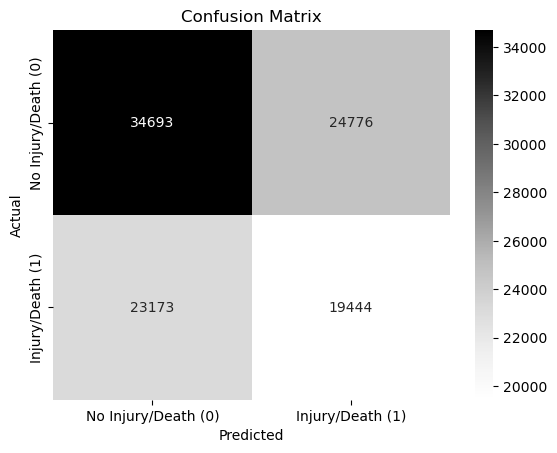

                     precision    recall  f1-score   support

No Injury/Death (0)       0.60      0.58      0.59     59469
   Injury/Death (1)       0.44      0.46      0.45     42617

           accuracy                           0.53    102086
          macro avg       0.52      0.52      0.52    102086
       weighted avg       0.53      0.53      0.53    102086



In [489]:
# confusion matrix
cm = confusion_matrix(y_test, pred_simple)

# visualizing with heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Greys',
            xticklabels=['No Injury/Death (0)', 'Injury/Death (1)'],
            yticklabels=['No Injury/Death (0)', 'Injury/Death (1)'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# report
print(classification_report(y_test, pred_simple, target_names=['No Injury/Death (0)', 'Injury/Death (1)']))



In [ ]:
df_enc.to_csv('/Users/Marcy_Student/Desktop/Marcy-Modules/Mod6/final-project/data/complex_model_data.csv')